<a href="https://colab.research.google.com/github/yuji-sgs/Machine-Learning/blob/main/Inverse_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 使用するライブラリをインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import io
from google.colab import files

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, LearningRateScheduler

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

In [2]:
# Google Colaboratoryでファイルをアップロード
uploaded = files.upload()

Saving data.csv to data.csv


In [3]:
# データフレームとして、変数dfに3列×10000行のデータを格納
df = pd.read_csv(io.BytesIO(uploaded['data.csv']))
df

,x1,x2,y
0,0.1,0.01,3.221500e-02
1,0.2,0.01,3.141500e-02
2,0.3,0.01,2.749700e-02
3,0.4,0.01,2.300000e-02
4,0.5,0.01,1.855400e-02
...,...,...,...
9995,9.6,1.00,5.240000e-14
9996,9.7,1.00,3.690000e-14
9997,9.8,1.00,2.040000e-14
9998,9.9,1.00,8.880000e-16


In [4]:
# データの分割
(train, test) = train_test_split(df, test_size=0.2, shuffle=True)

In [5]:
# x_train, x_testではcsvファイルの1列目から2列目を，y_train, y_testでは3列目のデータを活用
x_train = train.iloc[:, [0, 1]]
y_train = train.iloc[:, [2]]

x_test = test.iloc[:, [0, 1]]
y_test = test.iloc[:, [2]]

In [6]:
# モデルの構築
# inputの数
n_in = 2

# ノードの数
n_hidden = 64

# outputの数
n_out = 1

# 学習回数
epochs = 100
batch_size = 64

model = Sequential()
model.add(Dense(n_hidden, activation= 'relu', input_dim=n_in))
model.add(Dense(n_hidden, activation= 'relu', input_dim=n_in))
model.add(Dense(n_hidden, activation= 'relu', input_dim=n_in))
model.add(Dense(units=n_out))
model.summary()

optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
model.compile(loss='mean_squared_error', optimizer=optimizer)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                192       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 8577 (33.50 KB)
Trainable params: 8577 (33.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
# 学習オプション
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test))

Epoch 1/100
125/125 [==============================] - 2s 4ms/step - loss: 0.7952 - val_loss: 0.5495
Epoch 2/100
125/125 [==============================] - 0s 3ms/step - loss: 0.4390 - val_loss: 0.2315
Epoch 3/100
125/125 [==============================] - 0s 3ms/step - loss: 0.1786 - val_loss: 0.0820
Epoch 4/100
125/125 [==============================] - 0s 3ms/step - loss: 0.0727 - val_loss: 0.0392
Epoch 5/100
125/125 [==============================] - 0s 2ms/step - loss: 0.0336 - val_loss: 0.0220
Epoch 6/100
125/125 [==============================] - 0s 2ms/step - loss: 0.0284 - val_loss: 0.0093
Epoch 7/100
125/125 [==============================] - 0s 4ms/step - loss: 0.0129 - val_loss: 0.0063
Epoch 8/100
125/125 [==============================] - 1s 4ms/step - loss: 0.0094 - val_loss: 0.0084
Epoch 9/100
125/125 [==============================] - 1s 4ms/step - loss: 0.0075 - val_loss: 0.0036
Epoch 10/100
125/125 [==============================] - 0s 4ms/step - loss: 0.0058 - val_lo

In [8]:
# 構築したモデルで予測
test_predict = model.predict(x_test)

63/63 [==============================] - 0s 2ms/step


In [9]:
#精度評価指標
# MAE
test_MAE = mean_absolute_error(y_test, test_predict)
print('MAE：', test_MAE)

# MSE
test_MSE = mean_squared_error(y_test, test_predict)
print('MSE：', test_MSE)

# RMSE
test_RMSE = sqrt(mean_squared_error(y_test, test_predict))
print('RMSE：', test_RMSE)

# 決定係数
R2 = r2_score(y_test, test_predict)
print('R2：', R2)

MAE： 0.013134061886369877
MSE： 0.00027907605806983937
RMSE： 0.01670556967211353
R2： 0.9997919629234571


# 逆解析の実装
所望のyを設定して、それを実現するx1, x2を探索していく）

In [32]:
import tensorflow as tf

# 出力の所望値を設定
target_y = tf.constant([4.0], dtype=tf.float32)

# 初期の入力値をランダムに設定（x1は0から10の範囲、x2は0から1の範囲に制限）
x1 = tf.Variable(tf.random.uniform([1], 0, 10))
x2 = tf.Variable(tf.random.uniform([1], 0, 1))

# 最適化手法を定義
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

# 各値を保存するリスト
x1_values = []
x2_values = []

# 目的関数の値を保存するリスト
objective_values = []

# 学習回数
step = 1000

# パラメータ更新を実行
for step in range(step):
    # 勾配計算を行うためのAPI
    with tf.GradientTape() as tape:

        # モデルの出力を定義(予測値を計算)
        predicted_y = model(tf.stack([x1, x2], axis=1))
        # 目的関数を定義（予測値と目標値の二乗誤差を計算）
        objective = tf.square(predicted_y - target_y)

    # 勾配を計算(目的関数に対する各パラメータx1とx2の勾配を計算)
    gradients = tape.gradient(objective, [x1, x2])
    # 最適化手法を適用(計算された勾配を使用してパラメータx1とx2を更新)
    optimizer.apply_gradients(zip(gradients, [x1, x2]))

    # 各値を保存
    x1_values.append(x1.numpy()[0])
    x2_values.append(x2.numpy()[0])

    # 目的関数の値を保存
    objective_values.append(objective.numpy()[0][0])

    # 10ステップごとに結果を出力
    if step % 10 == 0:
        print(f'Epoch: {step}, Loss: {objective.numpy()[0][0]}, x1: {x1.numpy()}, x2: {x2.numpy()}')

# 最終的な学習結果を出力(x1とx2のパラメータ)
print(f'Loss: {objective.numpy()[0][0]}, x1: {x1.numpy()}, x2: {x2.numpy()}')

Epoch: 0, Loss: 12.378057479858398, x1: [5.4730206], x2: [0.8441667]
Epoch: 10, Loss: 10.071893692016602, x1: [5.5738754], x2: [0.7438492]
Epoch: 20, Loss: 7.583127498626709, x1: [5.6813836], x2: [0.64221096]
Epoch: 30, Loss: 5.130074501037598, x1: [5.795689], x2: [0.5412386]
Epoch: 40, Loss: 2.9524519443511963, x1: [5.920596], x2: [0.4432542]
Epoch: 50, Loss: 1.4914394617080688, x1: [6.051696], x2: [0.35704002]
Epoch: 60, Loss: 0.8072443604469299, x1: [6.1815352], x2: [0.2915377]
Epoch: 70, Loss: 0.6167930960655212, x1: [6.305561], x2: [0.2532146]
Epoch: 80, Loss: 0.5169282555580139, x1: [6.424553], x2: [0.23525934]
Epoch: 90, Loss: 0.44179508090019226, x1: [6.5366597], x2: [0.22737072]
Epoch: 100, Loss: 0.3754839599132538, x1: [6.6438384], x2: [0.22860743]
Epoch: 110, Loss: 0.321481317281723, x1: [6.7412386], x2: [0.22673613]
Epoch: 120, Loss: 0.2767966687679291, x1: [6.830216], x2: [0.2237073]
Epoch: 130, Loss: 0.23960375785827637, x1: [6.9126754], x2: [0.22344227]
Epoch: 140, Loss:

In [34]:
# 逆解析で得た入力パラメータをもとにyの結果を得る
predicted_value = model.predict(np.array([[8.027802, 0.21042259]]))

# yを確認（所望するyの値は4）
print("逆解析によって得られた入力パラメータによるyの値は：", predicted_value[0][0])

1/1 [==============================] - 0s 98ms/step
逆解析によって得られた入力パラメータによるyの値は： 3.9999926


# 結果の可視化
x1, x2のパラメータが変化することによってLossが減っていることがわかる

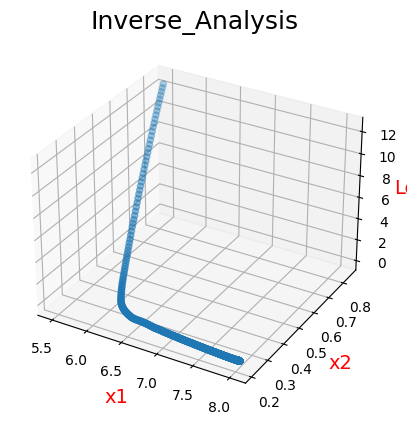

In [33]:
from mpl_toolkits.mplot3d import Axes3D

# x,y,zに要素追加
x = np.array(x1_values)
y = np.array(x2_values)
z = np.array(objective_values)

# Figureを追加
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Axesのタイトルを設定
ax.set_title("Inverse_Analysis", size = 18)
# 軸ラベルを設定
ax.set_xlabel("x1", size = 14, color = "r")
ax.set_ylabel("x2", size = 14, color = "r")
ax.set_zlabel("Loss", size = 14, color = "r")
ax.scatter(x1_values, x2_values, objective_values)
plt.show()